<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_0_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.4_n20.csv',
 'data_add_delta_-0.4_n30.csv',
 'data_add_delta_-0.4_n60.csv',
 'data_add_delta_-0.4_n120.csv',
 'data_add_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,95.903324,31.619477,47.139133,-0.341581,184.320353,184.603552,-0.283199
1,0.0,1.0,98.802694,95.336083,58.347959,-0.077384,262.409351,262.385626,0.023725
2,0.0,2.0,45.497161,54.904712,28.258733,0.082864,138.743470,138.565434,0.178036
3,0.0,3.0,49.442094,51.658154,82.461287,0.145433,193.706968,193.540211,0.166757
4,0.0,4.0,99.555159,76.844212,82.750937,0.042179,269.192489,269.097872,0.094616
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,27.768921,23.092898,79.761043,0.176099,140.798962,140.727627,0.071335
29996,999.0,26.0,98.882736,77.857211,52.125326,-0.142705,238.722568,238.812803,-0.090235
29997,999.0,27.0,49.841270,57.494319,20.917616,-0.340414,137.912791,138.258144,-0.345354
29998,999.0,28.0,42.504915,67.296507,92.215612,0.367661,212.384695,212.024288,0.360407


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,95.903324,31.619477,47.139133,-0.341581,184.320353,184.603552,-0.283199
1,0.0,1.0,98.802694,95.336083,58.347959,-0.077384,262.409351,262.385626,0.023725
2,0.0,2.0,45.497161,54.904712,28.258733,0.082864,138.743470,138.565434,0.178036
3,0.0,3.0,49.442094,51.658154,82.461287,0.145433,193.706968,193.540211,0.166757
4,0.0,4.0,99.555159,76.844212,82.750937,0.042179,269.192489,269.097872,0.094616
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,27.768921,23.092898,79.761043,0.176099,140.798962,140.727627,0.071335
29996,999.0,26.0,98.882736,77.857211,52.125326,-0.142705,238.722568,238.812803,-0.090235
29997,999.0,27.0,49.841270,57.494319,20.917616,-0.340414,137.912791,138.258144,-0.345354
29998,999.0,28.0,42.504915,67.296507,92.215612,0.367661,212.384695,212.024288,0.360407


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    95.903324  31.619477  47.139133  ...  184.320353  184.603552 -0.283199
      1.0    98.802694  95.336083  58.347959  ...  262.409351  262.385626  0.023725
      2.0    45.497161  54.904712  28.258733  ...  138.743470  138.565434  0.178036
      3.0    49.442094  51.658154  82.461287  ...  193.706968  193.540211  0.166757
      4.0    99.555159  76.844212  82.750937  ...  269.192489  269.097872  0.094616
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   27.768921  23.092898  79.761043  ...  140.798962  140.727627  0.071335
      26.0   98.882736  77.857211  52.125326  ...  238.722568  238.812803 -0.090235
      27.0   49.841270  57.494319  20.917616  ...  137.912791  138.258144 -0.345354
      28.0   42.504915  67.296507  92.215612  ...  212.384695  212.024288  0.360407
      29.0   31.282449  79.577452  58.394724  ...  179.165580  179.231529 -0.065949

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    95.903324  31.619477  47.139133  ...  184.320353  184.603552 -0.283199
      1.0    98.802694  95.336083  58.347959  ...  262.409351  262.385626  0.023725
      2.0    45.497161  54.904712  28.258733  ...  138.743470  138.565434  0.178036
      3.0    49.442094  51.658154  82.461287  ...  193.706968  193.540211  0.166757
      4.0    99.555159  76.844212  82.750937  ...  269.192489  269.097872  0.094616
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   27.768921  23.092898  79.761043  ...  140.798962  140.727627  0.071335
      26.0   98.882736  77.857211  52.125326  ...  238.722568  238.812803 -0.090235
      27.0   49.841270  57.494319  20.917616  ...  137.912791  138.258144 -0.345354
      28.0   42.504915  67.296507  92.215612  ...  212.384695  212.024288  0.360407
      29.0   31.282449  79.577452  58.394724  ...  179.165580  179.231529 -0.065949

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,95.903324,31.619477,47.139133,-0.341581,184.320353,184.603552,-0.283199
1,0.0,1.0,98.802694,95.336083,58.347959,-0.077384,262.409351,262.385626,0.023725
2,0.0,2.0,45.497161,54.904712,28.258733,0.082864,138.743470,138.565434,0.178036
3,0.0,3.0,49.442094,51.658154,82.461287,0.145433,193.706968,193.540211,0.166757
4,0.0,4.0,99.555159,76.844212,82.750937,0.042179,269.192489,269.097872,0.094616
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,27.768921,23.092898,79.761043,0.176099,140.798962,140.727627,0.071335
29996,999.0,26.0,98.882736,77.857211,52.125326,-0.142705,238.722568,238.812803,-0.090235
29997,999.0,27.0,49.841270,57.494319,20.917616,-0.340414,137.912791,138.258144,-0.345354
29998,999.0,28.0,42.504915,67.296507,92.215612,0.367661,212.384695,212.024288,0.360407


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    95.903324  31.619477  47.139133  ...  184.320353  184.603552 -0.283199
      1.0    98.802694  95.336083  58.347959  ...  262.409351  262.385626  0.023725
      2.0    45.497161  54.904712  28.258733  ...  138.743470  138.565434  0.178036
      3.0    49.442094  51.658154  82.461287  ...  193.706968  193.540211  0.166757
      4.0    99.555159  76.844212  82.750937  ...  269.192489  269.097872  0.094616
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   27.768921  23.092898  79.761043  ...  140.798962  140.727627  0.071335
      26.0   98.882736  77.857211  52.125326  ...  238.722568  238.812803 -0.090235
      27.0   49.841270  57.494319  20.917616  ...  137.912791  138.258144 -0.345354
      28.0   42.504915  67.296507  92.215612  ...  212.384695  212.024288  0.360407
      29.0   31.282449  79.577452  58.394724  ...  179.165580  179.231529 -0.065949

[30000 rows x 7 columns]

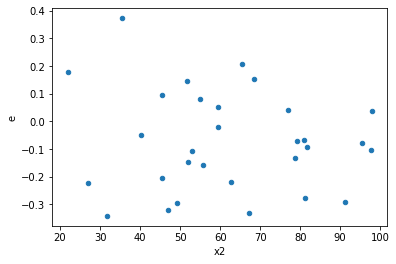

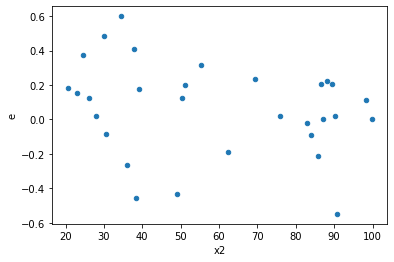

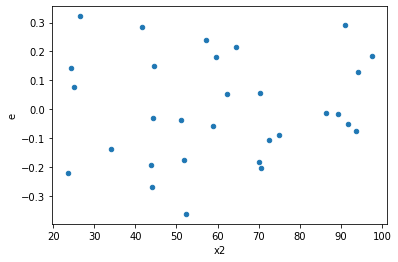

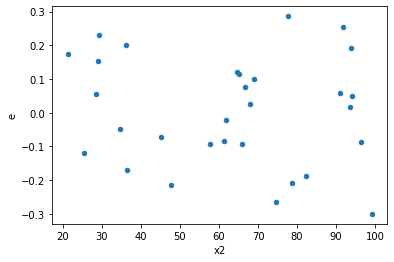

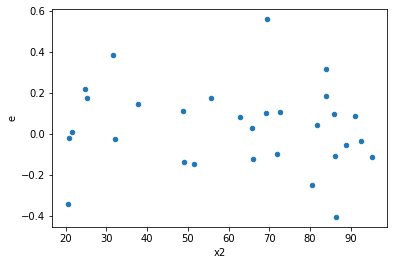

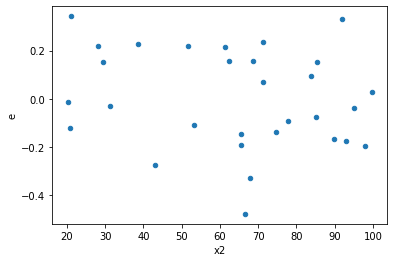

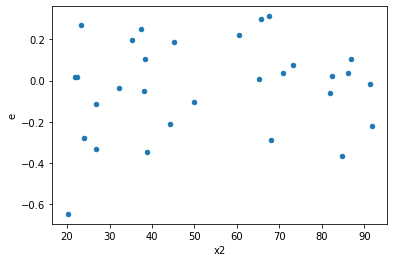

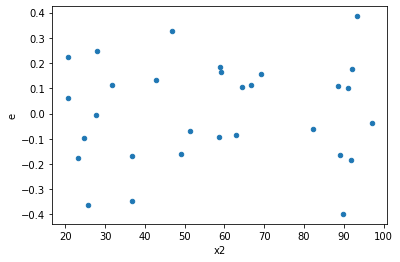

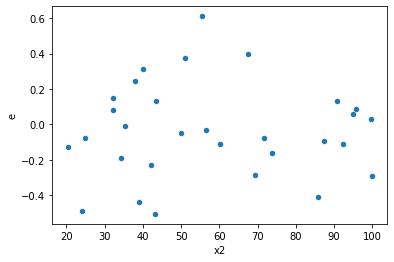

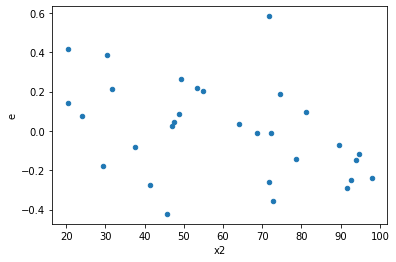

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
3.0,9.0,9.0,0.3649522516181594,0.18517074278738,0.04561903145226993,0.0231463428484225,1.9708958668336245,0.32663198172021635,0.8366840091398918,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,0.3916582101595854,0.2939221733241289,0.048957276269948176,0.03674027166551611,1.3325235239318811,0.6758420981458877,0.6620789509270562,Reject001=1 : Homoscedasticity
16.0,9.0,9.0,0.41728153325036366,0.4005907772470471,0.05216019165629546,0.05007384715588089,1.0416653526524482,0.9525100675629039,0.523744966218548,Reject001=1 : Homoscedasticity
19.0,9.0,9.0,0.366717203551832,0.09623986510643925,0.045839650443979,0.012029983138304907,3.8104500993039694,0.05910322394451706,0.9704483880277415,Reject001=1 : Homoscedasticity
21.0,9.0,9.0,0.6265663408792488,0.3360952666515866,0.0783207926099061,0.04201190833144833,1.8642522018281773,0.36718103216220355,0.8164094839188982,Reject001=1 : Homoscedasticity
24.0,9.0,9.0,0.26874641354605905,0.15584459107868795,0.03359330169325738,0.019480573884835994,1.7244513376172648,0.4293411951561066,0.7853294024219467,Reject001=1 : Homoscedasticity
26.0,9.0,9.0,0.6669924007757366,0.6641023880133868,0.08337405009696708,0.08301279850167335,1.0043517578230596,0.9949451248055865,0.5025274375972067,Reject001=1 : Homoscedasticity
29.0,9.0,9.0,0.4631109281653424,0.4624264125659102,0.0578888660206678,0.05780330157073878,1.001480269251131,0.9982780871151031,0.5008609564424484,Reject001=1 : Homoscedasticity
34.0,9.0,9.0,0.12873632705677251,0.09651705004718084,0.016092040882096564,0.012064631255897604,1.3338195375204878,0.6748106374194802,0.6625946812902599,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,0.16542227830177156,0.5254202021568363,0.020677784787721445,0.06567752526960453,0.3148380622266091,0.10023371472439704,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,0.30792489290716046,0.9208170485967155,0.03849061161339506,0.11510213107458944,0.3344039876069024,0.11833341938047147,Reject001=1 : Homoscedasticity
2.0,9.0,9.0,0.084933753941852,0.365120416418651,0.0106167192427315,0.045640052052331376,0.23261847358452298,0.040783754848788815,Reject001=1 : Homoscedasticity
3.0,9.0,9.0,0.3649522516181594,0.18517074278738,0.04561903145226993,0.0231463428484225,1.9708958668336245,0.32663198172021635,Reject001=1 : Homoscedasticity
4.0,9.0,9.0,0.2484228887530132,0.41707353176982404,0.03105286109412665,0.052134191471228004,0.5956333112265528,0.452109951560336,Reject001=1 : Homoscedasticity
5.0,9.0,9.0,0.17741872307981596,0.3358902994563867,0.022177340384976995,0.04198628743204834,0.528204367220354,0.35562737204468675,Reject001=1 : Homoscedasticity
6.0,9.0,9.0,0.33988455119335925,0.5204193369658494,0.04248556889916991,0.06505241712073118,0.6530974678515125,0.5357104292681255,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,0.3916582101595854,0.2939221733241289,0.048957276269948176,0.03674027166551611,1.3325235239318811,1.3241579018541123,Reject001=1 : Homoscedasticity
8.0,9.0,9.0,0.4058563297281198,0.5541131807612868,0.050732041216014975,0.06926414759516085,0.7324430167326477,0.650261452694635,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      943
Reject001=0 : Heteroscedasticity     57
Name: Result_test, dtype: int64